<a href="https://colab.research.google.com/github/JACOBABRAHAMJANE/Internship_Project_2/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **project** **2**


hand written digit prediction

#objective

The digit dataset consists of 8x8 pixel images of digits. The images attribute of dataset stores 8x8 arrays of grayscale values for each image. we will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each imiage represents.

---
A handwritten digit prediction system aims to accurately recognize and classify handwritten numerical digits from images.
Data preprocessing, including normalization and augmentation, enhances the model's performance. The system aims to facilitate applications like digit recognition in postal services, automated bank check processing, and digital form entry. By training on labeled examples, the model learns to identify unique features of each digit, ensuring precise classification.
The system's goal is to provide fast, reliable, and accurate digit recognition, reducing manual errors and increasing efficiency in various applications.the handwritten digit prediction system aims to streamline processes that involve digit recognition, ensuring accuracy and efficiency.

#import library

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp

#**import data**

In [9]:
from sklearn.datasets import load_digits

# Describe Data

In [10]:
df = load_digits()

In [11]:
print(df)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

# Data Visualization

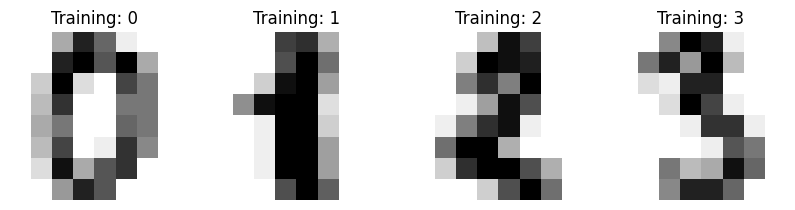

In [12]:
_, axes = mp.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=mp.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

#Data preprocessing

In [13]:
df.images.shape

(1797, 8, 8)

In [14]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [15]:
df.images[0].shape

(8, 8)

In [16]:
len(df.images)

1797

In [17]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [18]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [19]:
data[0].shape

(64,)

In [20]:
data.shape

(1797, 64)

#Define Target Variable (y) and Feature Variables (X)

Scalling Image Data

In [21]:
data.min()

0.0

In [22]:
data.max()

16.0

In [23]:
data = data/16

In [24]:
data.min()

0.0

In [25]:
data.max()

1.0

In [26]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

#Train teast split data

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(data,df.target,test_size=0.3)

In [29]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# Modeling


random forest model

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier()

In [32]:
rf.fit(x_train,y_train)

RandomForestClassifier()

#Predict test data

In [33]:
y_pred = rf.predict(x_test)

In [34]:
y_pred

array([9, 3, 9, 1, 0, 6, 8, 3, 0, 4, 2, 8, 1, 9, 3, 6, 4, 2, 3, 4, 5, 2,
       9, 5, 5, 3, 6, 8, 9, 7, 6, 2, 4, 2, 4, 7, 4, 5, 6, 6, 3, 8, 9, 0,
       1, 2, 4, 1, 9, 0, 1, 0, 0, 7, 8, 8, 4, 3, 3, 5, 6, 5, 8, 9, 8, 1,
       2, 9, 1, 0, 6, 6, 6, 2, 5, 6, 8, 1, 7, 6, 9, 3, 9, 6, 5, 8, 5, 1,
       9, 5, 4, 7, 0, 1, 0, 9, 7, 8, 3, 9, 2, 6, 9, 4, 1, 1, 6, 9, 6, 5,
       0, 4, 2, 5, 5, 1, 3, 6, 8, 6, 7, 5, 6, 9, 2, 6, 9, 5, 1, 0, 2, 2,
       1, 3, 4, 3, 5, 3, 9, 3, 8, 5, 2, 8, 1, 1, 6, 6, 8, 0, 7, 0, 8, 2,
       4, 7, 8, 8, 4, 1, 8, 2, 0, 0, 6, 1, 1, 4, 1, 8, 1, 1, 6, 0, 8, 6,
       2, 2, 8, 6, 0, 6, 5, 5, 4, 4, 8, 2, 1, 8, 1, 4, 8, 2, 6, 7, 9, 8,
       8, 9, 6, 5, 4, 2, 6, 4, 4, 1, 9, 0, 0, 5, 0, 0, 2, 4, 1, 1, 4, 7,
       2, 0, 5, 5, 0, 9, 7, 4, 3, 9, 4, 8, 7, 5, 8, 4, 9, 6, 4, 4, 5, 7,
       6, 7, 9, 9, 1, 5, 0, 2, 7, 5, 7, 8, 8, 7, 0, 3, 0, 2, 6, 0, 3, 3,
       9, 9, 4, 7, 1, 3, 2, 5, 9, 5, 7, 6, 1, 6, 9, 3, 3, 3, 9, 4, 3, 4,
       3, 1, 6, 5, 1, 4, 1, 6, 1, 7, 7, 7, 5, 6, 1,

#Model Evaluation

model accuracy

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
confusion_matrix(y_test, y_pred)

array([[53,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 51,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 51,  0,  1,  0,  2,  0,  1],
       [ 0,  0,  0,  0, 44,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1, 45,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1, 63,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 46,  0,  0],
       [ 0,  4,  0,  1,  0,  0,  0,  1, 55,  2],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  1, 54]])

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.92      0.98      0.95        57
           2       1.00      1.00      1.00        51
           3       0.98      0.91      0.94        56
           4       0.96      0.98      0.97        45
           5       0.92      0.96      0.94        47
           6       1.00      0.98      0.99        64
           7       0.94      1.00      0.97        46
           8       0.95      0.87      0.91        63
           9       0.93      0.95      0.94        57

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



#Explanation

A handwritten digit prediction system is designed to recognize and classify numerical digits written by hand, typically from images.The goal is to achieve high accuracy in identifying each digit from 0 to 9.Data preprocessing steps, like normalization and augmentation, are crucial for enhancing model performance.recognizing handwritten digits, the system reduces the need for manual data entry, minimizing errors and improving efficiency.The overall objective is to provide a reliable, fast, and accurate method for recognizing handwritten digits, streamlining processes in various fields.